In [18]:
# test file to look at the data and see how to use it
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
absolute_path = os.path.abspath("")


Reading csv from folder and then converting the time columns to datetime. This allows us to look at the time and parse it

In [28]:
hs1104df = pd.read_csv(absolute_path + "\cleanerHS1104.csv")
hs1104df["Time In"] = pd.to_datetime(hs1104df["Time In"])
hs1104df["Time Out"] = pd.to_datetime(hs1104df["Time Out"])
hs1104df["Time Out Clean"] = pd.to_datetime(hs1104df["Time Out Clean"])

hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id,Release Time,Time release
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-14 13:27:00,0:02:00,2,111461,11/4/2022 15:25:00,-120
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-14 15:14:00,1:20:00,80,111487,11/4/2022 15:25:00,-91
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-14 14:20:00,0:09:00,9,111534,11/4/2022 15:25:00,-74
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70
...,...,...,...,...,...,...,...,...,...,...,...
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-14 15:52:00,0:08:00,8,111857,11/4/2022 15:25:00,19
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-14 15:52:00,0:07:00,7,111861,11/4/2022 15:25:00,20
87,11/4/22 14:00,11th Grade,2022-11-04 15:50:00,2022-11-07 15:13:00,15:50,2023-05-14 15:13:00,71:23:00,"4,283",111869,11/4/2022 15:25:00,25
88,11/4/22 14:00,9th Grade,2022-11-04 15:53:00,2022-11-04 15:59:00,15:53,2023-05-14 15:59:00,0:06:00,6,111872,11/4/2022 15:25:00,28


Creating a difference tab that is a timeDelta between the two times

In [20]:
hs1104df["Difference"] = hs1104df["Time Out"] - hs1104df["Time In"]
hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id,Release Time,Time release,Difference
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-14 13:27:00,0:02:00,2,111461,11/4/2022 15:25:00,-120,0 days 00:02:00
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-14 15:14:00,1:20:00,80,111487,11/4/2022 15:25:00,-91,0 days 01:20:00
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-14 14:20:00,0:09:00,9,111534,11/4/2022 15:25:00,-74,0 days 00:09:00
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70,0 days 00:10:00
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-14 15:52:00,0:08:00,8,111857,11/4/2022 15:25:00,19,0 days 00:08:00
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-14 15:52:00,0:07:00,7,111861,11/4/2022 15:25:00,20,0 days 00:07:00
87,11/4/22 14:00,11th Grade,2022-11-04 15:50:00,2022-11-07 15:13:00,15:50,2023-05-14 15:13:00,71:23:00,"4,283",111869,11/4/2022 15:25:00,25,2 days 23:23:00
88,11/4/22 14:00,9th Grade,2022-11-04 15:53:00,2022-11-04 15:59:00,15:53,2023-05-14 15:59:00,0:06:00,6,111872,11/4/2022 15:25:00,28,0 days 00:06:00


IMPORTANT: Dropping all bad data from the data. The way this works is by looking at the difference between the two times. If it is greater than 5 hours, then it is determined to be bad data and dropped.

In [21]:
#eliminate bad data
#clean data
for index, row in hs1104df.iterrows():
    if (row["Difference"].total_seconds()/60) > 300:
        hs1104df.drop(index, inplace=True)

hs1104df

,Date,Dismissal Location,Time In,Time Out,Time In Clean,Time Out Clean,Time Difference,Diff Mins,carpool_id,Release Time,Time release,Difference
0,11/4/22 14:00,12th Grade,2022-11-04 13:25:00,2022-11-04 13:27:00,13:25,2023-05-14 13:27:00,0:02:00,2,111461,11/4/2022 15:25:00,-120,0 days 00:02:00
1,11/4/22 14:00,10th Grade,2022-11-04 13:54:00,2022-11-04 15:14:00,13:54,2023-05-14 15:14:00,1:20:00,80,111487,11/4/2022 15:25:00,-91,0 days 01:20:00
2,11/4/22 14:00,10th Grade,2022-11-04 14:11:00,2022-11-04 14:20:00,14:11,2023-05-14 14:20:00,0:09:00,9,111534,11/4/2022 15:25:00,-74,0 days 00:09:00
3,11/4/22 14:00,9th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70,0 days 00:10:00
4,11/4/22 14:00,12th Grade,2022-11-04 14:15:00,2022-11-04 14:25:00,14:15,2023-05-14 14:25:00,0:10:00,10,111551,11/4/2022 15:25:00,-70,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...
83,11/4/22 14:00,9th Grade,2022-11-04 15:40:00,2022-11-04 15:43:00,15:40,2023-05-14 15:43:00,0:03:00,3,111849,11/4/2022 15:25:00,15,0 days 00:03:00
84,11/4/22 14:00,11th Grade,2022-11-04 15:40:00,2022-11-04 15:53:00,15:40,2023-05-14 15:53:00,0:13:00,13,111851,11/4/2022 15:25:00,15,0 days 00:13:00
85,11/4/22 14:00,11th Grade,2022-11-04 15:44:00,2022-11-04 15:52:00,15:44,2023-05-14 15:52:00,0:08:00,8,111857,11/4/2022 15:25:00,19,0 days 00:08:00
86,11/4/22 14:00,9th Grade,2022-11-04 15:45:00,2022-11-04 15:52:00,15:45,2023-05-14 15:52:00,0:07:00,7,111861,11/4/2022 15:25:00,20,0 days 00:07:00


Creates a scatterplot. Unsuccessfully attempts to set the x axis times to something more readable

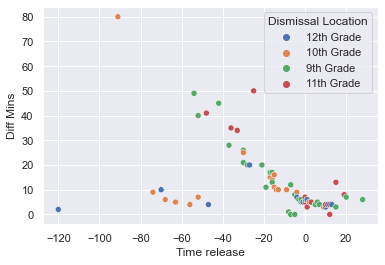

In [25]:
#using sns to make a scatterplot
sns.set_theme()
def plot_scatter_times(df):
    df["Time Difference"] = pd.to_datetime(df["Time Difference"])
    df["Diff Mins"] = df["Diff Mins"].astype(int)
    # fig, ax = plt.subplots()  
    sns.scatterplot(data=df, 
                     x="Time release",y="Diff Mins", hue="Dismissal Location")
    # fig.autofmt_xdate()
    # ax.set_xlim([datetime.time(13,0,0), datetime.time(16, 0, 0)])
    # ax.set_ylim([0, 8])
    # x_time = df["Time In"].dt.strftime("%H:%M").sort_values().unique()
    # ax.set_xticklabels(labels=x_time, rotation=45, ha='right')
plot_scatter_times(hs1104df)
    

In [30]:
xs = pd.to_datetime(hs1104df["Time In"]).apply(lambda x : x.total_seconds()/60)
ys = hs1104df["Time Out"].apply(lambda x : x.total_seconds()/60)
sns.lmplot(data=hs1104df,x=xs,y=ys)

AttributeError: 'Timestamp' object has no attribute 'total_seconds'